### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats
import warnings
warnings.filterwarnings('ignore')

#### Load the first dataset and check the first two observations

In [2]:
df= pd.read_csv('whitewine.csv')
df.shape

(4898, 1)

In [3]:
# check data types of variables
# type your code here

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.shape

(4898, 1)

In [5]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [6]:
from collections import defaultdict
f= defaultdict(list)

for i in [[i.split(';') for i in df.iloc[k]][0] for k in range(len(df))]:
  for j,k in enumerate(i):
    f[j].append(k)

In [7]:
a = [i.split(';"') for i in df.columns][0]
a

['fixed acidity',
 'volatile acidity"',
 'citric acid"',
 'residual sugar"',
 'chlorides"',
 'free sulfur dioxide"',
 'total sulfur dioxide"',
 'density"',
 'pH"',
 'sulphates"',
 'alcohol"',
 'quality"']

In [8]:
y= [i.strip('"') for i in a]
y

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df2= pd.DataFrame(f)
df2.columns = y

In [10]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [11]:
df2 = df2.astype(float)

In [12]:
df2['volatile acidity'].describe()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64

In [13]:
# we think every column other than free sulfur dioxide and Total sulfur dioxide should be " Exponentially" transformed - since they are right skewed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

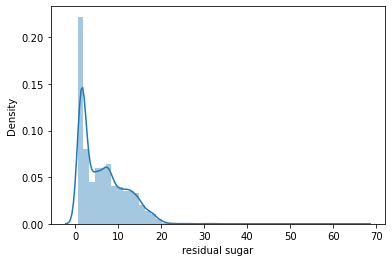

In [14]:
sns.distplot(df2['residual sugar'])
plt.show()

In [15]:
# right skewed; probably a log transform will help

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# we can see a reggression model and see the significance:
import statsmodels.api as sm
xc= sm.add_constant(df2.loc[:, df2.columns != 'quality'])
md= sm.OLS(df2['quality'], xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

citric acid  , chlorides , total sulfur dioxide contribute little to nothing to overall model

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

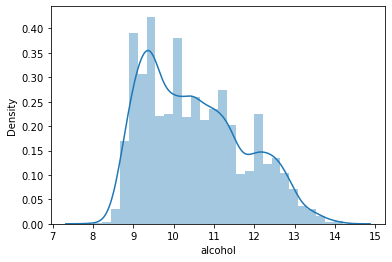

In [17]:
sns.distplot(df2['alcohol'])
plt.show()

In [18]:
# power transform will do a good job

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# Without scaling the pH

import statsmodels.api as sm
xc= sm.add_constant(df2.loc[:, df2.columns != 'quality'])
md= sm.OLS(df2['quality'], xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:40   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [20]:
# scaling ph
from sklearn.preprocessing import StandardScaler

dr= StandardScaler() 
df3 = df2.copy()
df3['s_ph'] = dr.fit_transform(df3[['pH']])
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,s_ph
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,-1.246921
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0.740029
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0.475102
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0.011480
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0.011480


In [21]:
df3.drop({'quality', 'pH'}, axis=1, inplace=True)

In [22]:
xc= sm.add_constant(df3)
md= sm.OLS(df2['quality'], xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:40   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811 

In [23]:
# no improvement in score. 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

ar = [vif(xc.values, i) for i in range(xc.shape[1])]
fr= pd.DataFrame(ar, index=xc.columns)
fr

,0
const,3.136297e+06
fixed acidity,2.691435e+00
volatile acidity,1.141156e+00
citric acid,1.165215e+00
residual sugar,1.264406e+01
chlorides,1.236822e+00
free sulfur dioxide,1.787880e+00
total sulfur dioxide,2.239233e+00
density,2.823255e+01
sulphates,1.138540e+00


In [25]:
# we have 2 columns having multicollinearity - Density and Residual sugar

In [26]:
# We can try fixing this issue by checking the significance of the contributions made by these columns- if they are not significant, we can drop them

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
xc= sm.add_constant(df2.loc[:, df2.columns != 'quality'])
md= sm.OLS(df2['quality'], xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:40   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

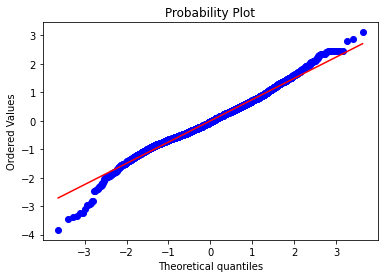

In [28]:
# QQ plot
import scipy.stats as stats

stats.probplot(md.resid, plot=plt)
plt.show()

In [29]:
# looks mostly normal only:

#lets do a JB test

stats.jarque_bera(md.resid)

Jarque_beraResult(statistic=251.63681680706614, pvalue=0.0)

In [30]:
# it is not normal

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

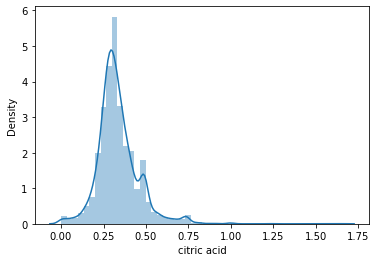

In [31]:
sns.distplot(df2['citric acid'])
plt.show()

In [32]:
# we can do a log transform and see. 

In [33]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [34]:
df_r = df2.copy()
df_r['tr_citric'] = np.log1p(df_r['citric acid'])
df_r.drop({'citric acid'}, axis=1, inplace= True)
df_r.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tr_citric
0,7.0,0.27,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0.307485
1,6.3,0.30,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0.292670
2,8.1,0.28,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0.336472
3,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0.277632
4,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0.277632


In [35]:
xc= sm.add_constant(df_r.loc[:, df_r.columns != 'quality'])
md= sm.OLS(df_r['quality'], xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:41   Log-Likelihood:                -5543.5
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.8039 

In [36]:
# Still insignificant. 

# transformation did not help. no improve in overall model performance

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
qual = df2['quality']
df2.drop({'quality'}, axis=1, inplace= True)

In [38]:
xc= sm.add_constant(df2.loc[:, df2.columns!= 'quality'])
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:41   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

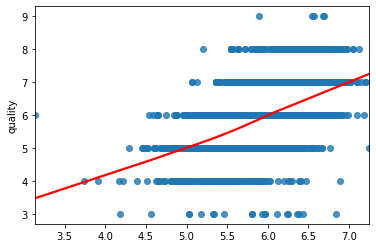

In [39]:
y_r = md.predict(xc)
sns.regplot(x=y_r, y=qual, lowess=True, line_kws={'color': 'red'})
plt.show()

In [40]:
# SInce p value of rainbow test is more than 0.05, we fail to reject the null hypothesis. model linearity can be explained by the cental values 

In [41]:
sm.stats.diagnostic.linear_rainbow(md)

(1.060162525521693, 0.07444168579082616)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# SFS

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [43]:


from sklearn.linear_model import LinearRegression
ar = LinearRegression()
sfs_ = sfs(ar, k_features=5, cv=3 ,n_jobs=-1)
sfs_.fit(df2, qual)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=5,
                          n_jobs=-1)

In [44]:
pd.DataFrame(sfs_.subsets_)

,1,2,3,4,5
feature_idx,"(10,)","(1, 10)","(1, 3, 10)","(1, 3, 9, 10)","(1, 3, 5, 9, 10)"
cv_scores,"[0.16574618114101658, 0.20917912605444056, 0.1...","[0.21385833173588997, 0.23852024663773097, 0.2...","[0.2022050407706666, 0.26510556487096426, 0.25...","[0.20514334320361594, 0.270694490236264, 0.255...","[0.21122032123102397, 0.27693899742367056, 0.2..."
avg_score,0.176708,0.229091,0.242409,0.243901,0.244463
feature_names,"(alcohol,)","(volatile acidity, alcohol)","(volatile acidity, residual sugar, alcohol)","(volatile acidity, residual sugar, sulphates, ...","(volatile acidity, residual sugar, free sulfur..."


In [45]:
# 5 top selected columns

sfs_.k_feature_names_

('volatile acidity',
 'residual sugar',
 'free sulfur dioxide',
 'sulphates',
 'alcohol')

In [46]:
rtr= df2[list(sfs_.k_feature_names_)]
xc= sm.add_constant(rtr)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:50   Log-Likelihood:                -5594.3
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4892   BIC:                         1.124e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9193    

In [47]:
# score is 26.6 percent.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
from sklearn.feature_selection import RFE
ar = LinearRegression()
rfe_ = RFE(ar, n_features_to_select = 5)
rfe_.fit(df2, qual)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [49]:
al = pd.DataFrame(rfe_.ranking_, index=df2.columns, columns=['ranks'])

In [50]:
al.loc[al['ranks'] == 1]

,ranks
volatile acidity,1
chlorides,1
density,1
sulphates,1
alcohol,1


In [51]:
rr= al.loc[al['ranks'] == 1].index
df_new= df2[rr]
df_new.head()

,volatile acidity,chlorides,density,sulphates,alcohol
0,0.27,0.045,1.0010,0.45,8.8
1,0.30,0.049,0.9940,0.49,9.5
2,0.28,0.050,0.9951,0.44,10.1
3,0.23,0.058,0.9956,0.40,9.9
4,0.23,0.058,0.9956,0.40,9.9


In [52]:
xc= sm.add_constant(df_new)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     326.0
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          3.90e-302
Time:                        16:39:50   Log-Likelihood:                -5650.4
No. Observations:                4898   AIC:                         1.131e+04
Df Residuals:                    4892   BIC:                         1.135e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -33.4308      6.030  

In [53]:
# The scores are good but not that great compared to a model which takes input all the parameters.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
ty= {}
for i in range(2,7):
  ar = LinearRegression()
  sfs_ = sfs(ar, k_features=i, cv=3 ,n_jobs=-1)
  sfs_.fit(df2, qual)
  ty[i] = sfs_.k_feature_names_

In [55]:
ty

{2: ('volatile acidity', 'alcohol'),
 3: ('volatile acidity', 'residual sugar', 'alcohol'),
 4: ('volatile acidity', 'residual sugar', 'sulphates', 'alcohol'),
 5: ('volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'sulphates',
  'alcohol'),
 6: ('volatile acidity',
  'residual sugar',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'sulphates',
  'alcohol')}

In [56]:
for i in ty.values():
  df_temp = df2[list(i)]
  xc= sm.add_constant(df_temp)
  md= sm.OLS(qual, xc).fit()
  print(len(list(i)), md.rsquared)

2 0.2402311847533618
3 0.25852615806597845
4 0.26192831742556777
5 0.26688090719411617
6 0.2680124845073987


In [57]:
# the best R2 is the model with the highest number of features- 6

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# Using a grid search to give us the no of features and then putting that in forward selection.

from sklearn.model_selection import KFold, GridSearchCV
ar = LinearRegression()
rfe_1 = RFE(ar)
to_sel = {'n_features_to_select': list(range(1,df2.shape[1]-1))}
gs= GridSearchCV(rfe_1, param_grid= to_sel,scoring= 'r2', cv=3)
gs.fit(df2, qual)  

GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='r2')

In [59]:
gs.best_params_

{'n_features_to_select': 8}

In [60]:
sfs_2 = sfs(ar, k_features=8, cv=3 ,n_jobs=-1)
sfs_2.fit(df2, qual)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=8,
                          n_jobs=-1)

In [61]:
we = list(sfs_2.k_feature_names_)

In [62]:
df_temp = df2[we]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()

In [63]:
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     224.9
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -5587.1
No. Observations:                4898   AIC:                         1.119e+04
Df Residuals:                    4889   BIC:                         1.125e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2202 

In [64]:
# R square is 26.8 percent

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# we have got the number of features as 8

rfe_ = RFE(ar, n_features_to_select = 8)
rfe_.fit(df2, qual)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [66]:
al2 = pd.DataFrame(rfe_.ranking_, index=df2.columns, columns=['ranks'])
al2.loc[al2['ranks'] == 1]

,ranks
fixed acidity,1
volatile acidity,1
residual sugar,1
chlorides,1
density,1
pH,1
sulphates,1
alcohol,1


In [67]:
we2= list(al2.loc[al2['ranks'] == 1].index)

In [68]:
df_temp = df2[we2]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     235.5
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -5556.4
No. Observations:                4898   AIC:                         1.113e+04
Df Residuals:                    4889   BIC:                         1.119e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              156.8910     18.407  

In [69]:
# score indeed has improved. 

# RFE helped  with 8 features.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
# same as before- we ran a RFE along with Grid search to find out that best number of features is 8

df_temp = df2[we2]
xc= sm.add_constant(df_temp)
md= sm.OLS(qual, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     235.5
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -5556.4
No. Observations:                4898   AIC:                         1.113e+04
Df Residuals:                    4889   BIC:                         1.119e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              156.8910     18.407  

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
rtr= df2[list(sfs_.k_feature_names_)]
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(rtr, qual)

In [72]:
xc= sm.add_constant(x_tr)
md= sm.OLS(y_tr, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     220.2
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.16e-240
Time:                        16:39:52   Log-Likelihood:                -4178.6
No. Observations:                3673   AIC:                             8371.
Df Residuals:                    3666   BIC:                             8415.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1205 

In [73]:
xc1= sm.add_constant(x_ts)
md= sm.OLS(y_ts, xc1).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     78.63
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           3.77e-83
Time:                        16:39:52   Log-Likelihood:                -1409.5
No. Observations:                1225   AIC:                             2833.
Df Residuals:                    1218   BIC:                             2869.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9121 

In [74]:
# The model is slightly overfitting on training data. 

# Reasons could be selecting only the highest contributing features- which has significantly stronger variance-effecting nature of the fit of the model.

# Another reason of overfit is- Less data. More data could have helped us generalize the model more

In [75]:
y_tr_score = md.predict(xc)

xtr = sm.add_constant(x_ts)
y_ts_score = md.predict(xtr)

In [76]:
len(y_tr)

3673

In [77]:
# training accuracy
from sklearn.metrics import mean_squared_error, r2_score

print('training', r2_score(y_tr_score, y_tr), mean_squared_error(y_tr_score, y_tr))
print('test', r2_score(y_ts_score, y_ts), mean_squared_error(y_ts_score, y_ts))

training -1.4638656002508457 0.572620629283139
test -1.581707374164918 0.584748979245684


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
df_r = df2.copy()
df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [79]:
df_r['cat_pH'] = pd.cut(df_r['pH'], bins=3, labels=['acidic', 'normal', 'basic'])

In [80]:
df_r = pd.get_dummies(data= df_r, columns=['cat_pH'], drop_first=True)

In [81]:
df_r.drop({'pH'}, axis=1, inplace= True)

In [82]:
xc1= sm.add_constant(df_r)
md= sm.OLS(qual, xc1).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     155.7
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:52   Log-Likelihood:                -5561.4
No. Observations:                4898   AIC:                         1.115e+04
Df Residuals:                    4885   BIC:                         1.123e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   95.0480 

In [83]:
# P values of both of them are less than 0.05- so both of them are significantly contributing. 

# cat_pH_basic is contributing more as the coeff is larger

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
xc1= sm.add_constant(df2)
md= sm.OLS(qual, xc1).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:39:53   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928 

In [85]:
# using cross val

ar = LinearRegression()
from sklearn.model_selection import cross_val_score
Kf = KFold(n_splits=5, shuffle=True, random_state=4)
cv = cross_val_score(ar, df2, qual, scoring = 'r2', cv=Kf)
cv

array([0.28423982, 0.33196733, 0.27179256, 0.23195764, 0.25285897])

In [86]:
np.mean(cv)

0.27456326396006464

In [87]:
# we are getting better r2 score without cross validation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

cv2 = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [89]:
scores = cross_val_score(ar, df2, qual, scoring = 'r2', cv=cv2, n_jobs=-1)
print(np.mean(scores), np.std(scores))

0.2740976807979657 0.01583513771211195


In [90]:
# score after 5 fold is 0.27

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
from sklearn.model_selection import LeaveOneOut

In [92]:
loc= LeaveOneOut()
cv3 = cross_val_score(ar, df2, qual, scoring = 'neg_mean_squared_error', cv=loc, n_jobs=-1)

In [93]:
print(np.sqrt(-1*cv3.mean()))

0.7541120584743232


In [94]:
# RMSE is 0.75

In [95]:
cv3

array([-0.19207249, -0.61521635, -0.05473902, ..., -0.43494117,
       -0.18445862, -0.12105398])